# Electric Kit Lab

### 1.) Upload a picture of your LED circuit with the LED on.

![Picture of LED On](LED-On.jpg)


### 2)  Upload a picture of your single resistor circuit with the ammeter taking a current measurement.

![Picture of Current Measurement](CurrentMeasure.jpg)

### 3.) List your results for  R±δR  from Part 5.  Do your three ways of determining  R±δR  for your resistor agree with each other?

See below error library...

#### Usual Error Library...

In [3]:
from IPython.display import Markdown
from typing import Iterable, Tuple, Union
import numpy as np
# Define our rules...

def rule_1(c, error_val):
    return abs(c) * error_val

def rule_2(c, val, error_val, power):
    return abs(c * power * val ** (power - 1)) * error_val

def rule_3(*err_vals: Iterable[float]) -> float:
    """
    Calculate rule 3 from the paper 'Treatment of Data'.
    
    @param err_vals: A list of parameters, being the errors in each value. It is assumed they were summed 
                     together to get the final value.
    
    @returns: The error of all of the sum of the values...
    """
    total = 0
    
    for err in err_vals:
        total += err ** 2
    
    return np.sqrt(total)


def rule_4(value: float, *error_list: Iterable[Tuple[float, float, float]]) -> float:
    """
    Calculate rule 4 from the paper 'Treatment of Data'.
    
    @param value: The value of the thing we are trying to calculate the error of.
    @param error_list: A list of length 3 tuples. 
                       Each tuple should contain:
                       - A float: A value in the error formula.
                       - A float: The measured error in the above value.
                       - A float: The power of the above value in the multiplicative formula.

    @returns: A float, being the error in 'value'.
    """
    total = 0
    
    for x, x_err, power in error_list:
        total += (power * (x_err / x)) ** 2
        
    return abs(value) * np.sqrt(total)

# Fixed bug in checking code below...
FloatVec = Union[float, np.ndarray] 
BoolVec = Union[bool, np.ndarray]

def values_agree(val_1: FloatVec, err_1: FloatVec, val_2: FloatVec, err_2: FloatVec) -> BoolVec:
    """
    Determines if the values in 2 vectors(arrays) agree with each other, given there uncertainty values. 
    
    @param val_1: The 1st array of values.
    @param err_1: The uncertainty values for the 1st vector.
    @param val_2: The 2nd array of values.
    @param err_2: The uncertainty values for the 2st vector. 
    
    @returns: A vector of booleans, being whether each value agrees with the other.
    """
    # Grab the ranges for each value...
    r11, r12 = val_1 - err_1, val_1 + err_1
    r21, r22 = val_2 - err_2, val_2 + err_2
    
    # The ranges are sorted (r21 <= r22 and r11 <= r12), so the simple 2 checks below are enough. 
    # Check 1: Does r21(lowest value of 2nd range) land above the 1st range? If so fail...
    # Check 2: Does r22(highest value of 2nd range) fall below the 1st range? If so fail...
    return ((r21 <= r12) & (r11 <= r22))

#### Plotting & Calculation Code:

#### Part 1: Resistor Calculation

My results for methods 1 & 2 agree, but my results I got from using Ohm's law (method 3) do not agree with the other 2. As to why, I am not sure...

In [7]:
# Method 1: Color Code: 330 ± 5 Ohms
# Method 2: Using multimeter in Ohm mode: 327 ± 1 Ohms

# Method 3: Measure using Ohms Law and multimeter.
V, err_V = 3.22, 0.01
I, err_I = 9.5 / 1000, 0.1 / 1000

R = V / I
err_R = rule_4(R, (V, err_V, 1), (I, err_I, -1))

print(f"Resistance from multimeter: {R:.02f} ± {err_R:.02f} Ohms")

Resistance from multimeter: 338.95 ± 3.72 Ohms


### 4. Provide the github link for your plot from Part 6.  Is a lamp bulb an ohmic device?

#### Part 2: Is a Lamp Ohmic?

Note: My 3 pack battery holder was broken, so I was unable to include 3 batteries in the plot. 

After plotting the voltage vs the current, my results show that the lamp bulb is an ohmic device. We can tell as the voltage and current have a linear correlation, or fit a linear line rather well. The plot also indicates the resistance of the lamp is ~90 Ohms.

,Batteries,V,V Error,mA,mA Error
0,1,1.45,0.01,42.2,0.1
1,2,3.12,0.01,63.5,0.1
2,4,5.80,0.01,89.9,0.1


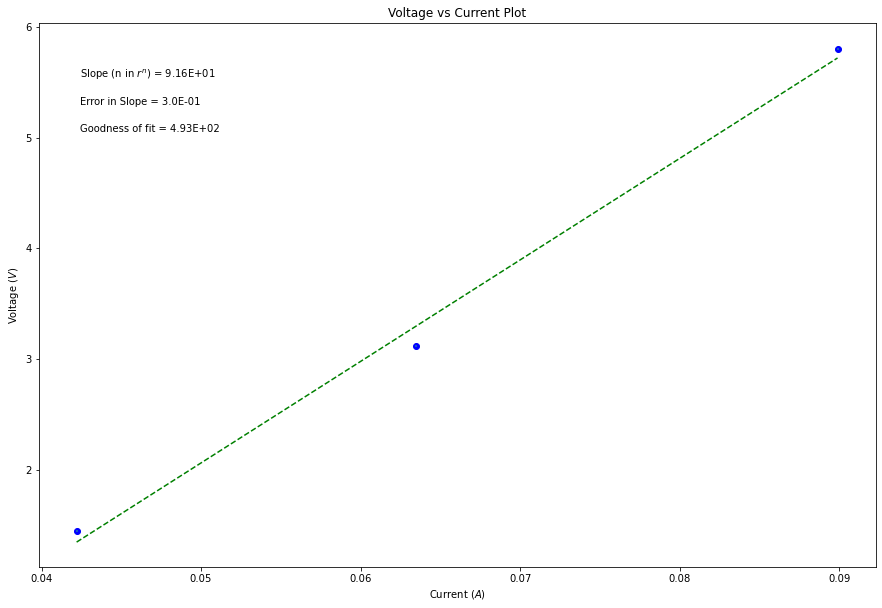

In [22]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from IPython.display import Markdown

data = pd.read_csv("LampData.csv")

# Display the table...
display(data)

#--------------------------------------------#
#Re-assign variables as x, y, dy so that the following code may remain generic

x = data["mA"] / 1000  # Current, I in Amps
y = data["V"]  # Voltage (Electric Potential), in Volts
dy = data["V Error"]  # Error in Voltage
 
#Find the intercept and slope, b and m, from Python's polynomial fitting function
b, m=np.polynomial.polynomial.polyfit(x,y,1,w=dy)

#Write the equation for the best fit line based on the slope and intercept
fit = b+m*x

#Calculate the error in slope and intercept 
#def Delta(x, dy) is a function, and we will learn how to write our own at a later date. They are very useful!
def Delta(x, dy):
    D = (sum(1/dy**2))*(sum(x**2/dy**2))-(sum(x/dy**2))**2
    return D
 
D=Delta(x, dy)
 
dm = np.sqrt(1/D*sum(1/dy**2)) #error in slope
db = np.sqrt(1/D*sum(x**2/dy**2)) #error in intercept

#Calculate the "goodness of fit" from the linear least squares fitting document
def LLSFD2(x,y,dy):
    N = sum(((y-b-m*x)/dy)**2)
    return N
                      
N = LLSFD2(x,y,dy)

#-----------------------------------------------------------------------#
#Plot data on graph. Plot error bars and place values for slope, error in slope and goodness of fit on the plot using "annotate"
plt.figure(figsize=(15,10))
 
plt.plot(x, fit, color='green', linestyle='--')
plt.scatter(x, y, color='blue', marker='o')
 
plt.xlabel('Current $(A)$')
plt.ylabel('Voltage $(V)$')
plt.title('Voltage vs Current Plot')
 
plt.errorbar(x, y, yerr=dy, xerr=None, fmt="none") #don't need to plot x error bars
 
plt.annotate('Slope (n in $r^n$) = {value:.{digits}E}'.format(value=m, digits=2),
             (0.05, 0.9), xycoords='axes fraction')
 
plt.annotate('Error in Slope = {value:.{digits}E}'.format(value=dm, digits=1),
             (0.05, 0.85), xycoords='axes fraction')
 
plt.annotate('Goodness of fit = {value:.{digits}E}'.format(value=N, digits=2),
             (0.05, 0.80), xycoords='axes fraction')

plt.show()